## **ガウス過程回帰**モジュールGPyの使い方

In [14]:
import numpy as np

def func(x):
    fx = np.sum(np.cos(2*np.pi*x))
    return fx

xa  = np.linspace(-1,1,101)
ya = np.linspace(-1,1,101)
Xa, Ya = np.meshgrid(xa,ya)

Za = np.zeros([101,101])
for i in range(len(Xa)):
    for j in range(len(Ya)):
        x =  np.array([Xa[i,j], Ya[i,j]])
        Za[i,j] = func(x)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline




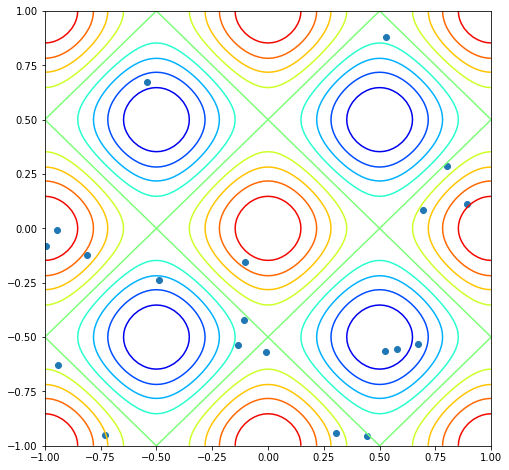

In [16]:
import random 
random.seed(1)

n_sample = 20
Xa_rand = [random.random()*2-1 for i in range(n_sample)]
Ya_rand = [random.random()*2-1 for i in range(n_sample)]

xlist = np.stack([Xa_rand, Ya_rand], axis=1)
Za_rand = []
for x in xlist:
    Za_rand = np.append(Za_rand,func(x))

fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111)
ax1.contour(Xa,Ya,Za,cmap='jet',levels=10,alpha=1)
plt.xlim(-1,1)
plt.ylim(-1,1)
ax1.scatter(Xa_rand,Ya_rand)

Text(0, 0.5, 'x2')

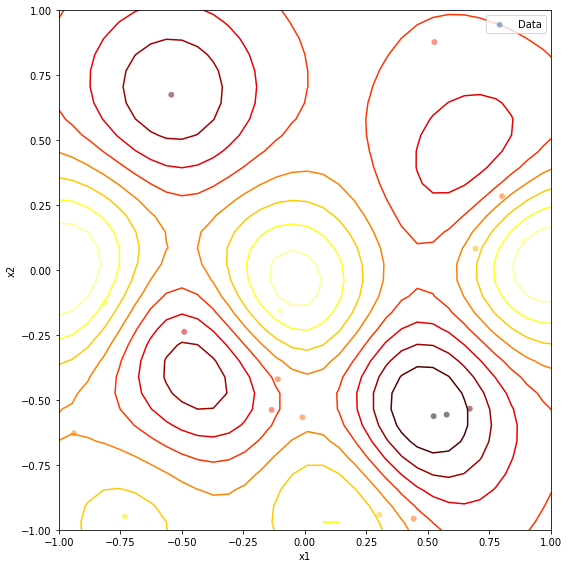

In [22]:
# ガウス過程回帰
import GPy

Input = np.stack([Xa_rand,Ya_rand],axis=1)
Output = Za_rand[:,None]

kernel = GPy.kern.RBF(2)
model = GPy.models.GPRegression(Input,Output,kernel)
model.optimize(messages=True,max_iters=1e5)

model.plot(levels=10)
plt.gcf().set_size_inches(8,8,forward=True)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("x1")
plt.ylabel("x2")